<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/King_Couty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#importando a biblioteca que pega a cidade utilizando o zip
!pip install pyzipcode -q

In [59]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.graph_objs import *
import plotly.express as px
from pyzipcode import ZipCodeDatabase


Importação dos dados e análise inicial




In [60]:
#Leitura dos dados

df = pd.read_csv('/content/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [61]:
#verificar se o imóvel foi vendido mais de uma vez no período. 
#O [:10] é dentro de uma lista como eu faço um head(10)
df['id'].value_counts()[:10]
#Por padrão o value_counts mostra em ordem decrescente (maior para o menor) e exclui valores nulos, olhar a biblioteca

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
1954420170    2
6381500170    2
7167000040    2
9407110710    2
1000102       2
Name: id, dtype: int64

In [62]:
#Analisando o imóvel mais vendido - 3 vendas em 1 ano (2014-2015)
df[df['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,20140924T000000,115000.00,3,1.00,1080,6250,1.00,0,0,...,5,1080,0,1950,0,98168,47.50,-122.33,1070,6250
17603,795000620,20141215T000000,124000.00,3,1.00,1080,6250,1.00,0,0,...,5,1080,0,1950,0,98168,47.50,-122.33,1070,6250
17604,795000620,20150311T000000,157000.00,3,1.00,1080,6250,1.00,0,0,...,5,1080,0,1950,0,98168,47.50,-122.33,1070,6250


In [63]:
#Testando pra outro imóvel que foi vendido mais de uma vez
df[df['id'] == 8651510380]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6789,8651510380,20140821T000000,310000.00,3,2.00,2070,9195,1.00,0,0,...,8,1220,850,1982,0,98074,47.65,-122.06,2080,9551
6790,8651510380,20141216T000000,539000.00,3,2.00,2070,9195,1.00,0,0,...,8,1220,850,1982,0,98074,47.65,-122.06,2080,9551


In [64]:
#Testando novamente pra outro imóvel que foi vendido mais de uma vez
df[df['id'] == 9407110710]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2493,9407110710,20141107T000000,195000.00,3,1.75,1510,8400,1.00,0,0,...,7,980,530,1979,0,98045,47.45,-121.77,1500,10125
2494,9407110710,20150226T000000,322000.00,3,1.75,1510,8400,1.00,0,0,...,7,980,530,1979,0,98045,47.45,-121.77,1500,10125


In [65]:
#Até então todos os imóveis que foram testados acima se valorizaram ao serem vendidos

In [66]:
#Verificando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
#Mudando a formatação da coluna data, o Y é maiusculo
df['date'] = pd.to_datetime(df['date'],format='%Y%m%dT000000')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [68]:
#verificando as últimas linhas
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,2014-10-15,325000.00,2,0.75,1020,1076,2.00,0,0,...,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


In [85]:
#Criando uma coluna chamada City com valores nulos pra poder usar a função abaixo
df['City'] = np.nan

In [86]:
#Baxei a biblioteca pra poder indetificar a cidade associada a esse zipcode
! pip install uszipcode
from uszipcode import SearchEngine
engine = SearchEngine()
for index, row in df.iterrows():
  zipcode = engine.by_zipcode(df['zipcode'][index])
  df['City'][index] = zipcode.major_city

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
Exception ignored in: <function SearchEngine.__del__ at 0x7fd38f584cb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchem

In [71]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,Seattle
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,Seattle
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,Seattle
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,Sammamish


In [72]:
#area livre pra construção - indicativo de expansão
#Diferença entre a área total - área habitável
df['sqft_free']= df['sqft_lot'] - df['sqft_living']

In [73]:
# O custo por metro ao quadradro é Cm2 = Preco da Venda/tamanho da casa
#preço por area habitavel
df['$/ft2_living'] = df['price']/df['sqft_living']

In [74]:
#preço por area do lote
# df.sample - Retorna uma amostra aleatória de itens de um dataframe
df['$/ft'] = df['price']/df['sqft_lot']
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,sqft_free,$/ft2_living,$/ft
16927,4022902555,2015-03-21,609000.00,4,2.50,3240,23870,1.00,0,0,...,0,98155,47.77,-122.28,2290,13340,Seattle,20630,187.96,25.51


In [75]:
#Ordena o dataset conforme id e a data para podermos calcular o lucro por período, observe que tem id que se repetem
#Resetando o indice reset_index
df.sort_values(['id', 'date']).reset_index(drop=True)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,sqft_free,$/ft2_living,$/ft
0,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,...,0,98002,47.33,-122.21,2060,7316,Auburn,6973,116.67,29.87
1,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,0,98002,47.33,-122.21,2060,7316,Auburn,6973,125.00,32.01
2,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,0,98166,47.44,-122.35,2590,21891,Seattle,23976,314.32,24.87
3,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,0,98166,47.44,-122.35,2250,20023,Seattle,41540,273.97,9.30
4,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,0,98168,47.48,-122.27,1290,10320,Seattle,6169,164.34,30.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9842300095,2014-07-25,365000.00,5,2.00,1600,4168,1.50,0,0,...,0,98126,47.53,-122.38,1190,4168,Seattle,2568,228.12,87.57
21609,9842300485,2015-03-11,380000.00,2,1.00,1040,7372,1.00,0,0,...,0,98126,47.53,-122.38,1930,5150,Seattle,6332,365.38,51.55
21610,9842300540,2014-06-24,339000.00,3,1.00,1100,4128,1.00,0,0,...,0,98126,47.53,-122.38,1510,4538,Seattle,3028,308.18,82.12
21611,9895000040,2014-07-03,399900.00,2,1.75,1410,1005,1.50,0,0,...,0,98027,47.54,-122.02,1440,1188,Issaquah,-405,283.62,397.91


In [76]:
#Calculo do lucro máximo do imóvel
#break: é quebrar, quebra (ou interrompe) o fluxo natural do programa
#continue: é continuar, ou seja, continua o fluxo natural do ciclo
#pass: é passar, ou seja, deixa passar.
#.shape número de elementos de uma linha e coluna

profit_list = [] 
df_sorted = df.sort_values(['id', 'date']).reset_index(drop=True)
for i in range(0, df_sorted.shape[0]):
  if i == 0:
#se 0=0 adicione na lista o valor 0, só ver o print
    profit_list.append(0)
    pass
# O id do df_sorted[1,0] == df_sorted[0,0]?
#Sim, então adicione a lista o valor da subtração da coluna de preço do valor atual com o anterior
  else:
    if df_sorted.iloc[i,0] == df_sorted.iloc[i-1,0]:
      profit_list.append(df_sorted.iloc[i,2] - df_sorted.iloc[i-1,2])
#se os id não forem iguais, adicione na lista o valor 0
    else:
      profit_list.append(0)

#print(profit_list)
#sorted retorna uma lista em ordem decerescente
sorted(profit_list, reverse=True)[:10]


[529950.0,
 390000.0,
 371500.0,
 368100.0,
 344950.0,
 339500.0,
 332500.0,
 332500.0,
 325000.0,
 325000.0]

In [77]:
#criando uma coluna lucro máximo que vi recebe os valores da lista 
df_sorted['profit'] = profit_list
#Verificando um imóvel que mais teve revenda
df_sorted[df_sorted['id'] == 795000620]
#observe que o lucro aumenta de acordo com a valorização preço por area do lote

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,City,sqft_free,$/ft2_living,$/ft,profit
1619,795000620,2014-09-24,115000.00,3,1.00,1080,6250,1.00,0,0,...,98168,47.50,-122.33,1070,6250,Seattle,5170,106.48,18.40,0.00
1620,795000620,2014-12-15,124000.00,3,1.00,1080,6250,1.00,0,0,...,98168,47.50,-122.33,1070,6250,Seattle,5170,114.81,19.84,9000.00
1621,795000620,2015-03-11,157000.00,3,1.00,1080,6250,1.00,0,0,...,98168,47.50,-122.33,1070,6250,Seattle,5170,145.37,25.12,33000.00


Limpeza dos Dados

In [78]:
#Calculo dos percentis
#chamando o dataframe atual ao do inicio
df = df_sorted
#excluindo linha exatamente iguais e o inplace=True é pra quando rodar o dataframe permanecer esse padrão.
#ou seja, o df do inicio tinha 21613 linhas, agora exclui os valores duplicados
df.drop_duplicates(inplace=True)
df.shape
#o que mostra que não teve valores duplicados

(21613, 26)

In [79]:
#Deixar duas casas decimais no dataframe
pd.set_option("float_format","{:.2f}".format)

In [80]:
#Tenho que lembrar pra que serve
#df.describe(percentiles=[0.95,0.975,0.99,0.995])
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_free,$/ft2_living,$/ft,profit
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,...,84.40,98077.94,47.56,-122.21,1986.55,12768.46,13027.07,264.16,88.97,1111.50
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,...,401.68,53.51,0.14,0.14,685.39,27304.18,41271.70,110.06,94.06,15235.12
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,399.00,651.00,-1900.00,87.59,0.16,-40000.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,...,0.00,98033.00,47.47,-122.33,1490.00,5100.00,3095.00,182.29,33.33,0.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,...,0.00,98065.00,47.57,-122.23,1840.00,7620.00,5710.00,244.64,59.22,0.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,...,0.00,98118.00,47.68,-122.12,2360.00,10083.00,8663.00,318.32,107.59,0.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1650059.00,810.14,2027.21,529950.00


In [81]:
#armazenando 99,5% dos dados em uma variável chamda dic_lim
describe_df = df.describe(percentiles=[0.995])
#criei uma lista dentro de uma lista
dic_lim = describe_df[['price','bedrooms','bathrooms','sqft_living',
                       'sqft_lot','floors','view','condition','grade','sqft_above',
                       'sqft_basement','sqft_living15','sqft_lot15','profit']]
#Observe que não substiui o df original, apenas salvei algumas coluna e uma variável 
dic_lim

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,profit
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.23,3.41,7.66,1788.39,291.51,1986.55,12768.46,1111.50
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.77,0.65,1.18,828.09,442.58,685.39,27304.18,15235.12
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,399.00,651.00,-40000.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1840.00,7620.00,0.00
99.5%,2453290.00,6.00,4.50,5583.16,247342.58,3.00,4.00,5.00,11.00,4820.00,1869.40,4440.00,216892.96,95000.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,9410.00,4820.00,6210.00,871200.00,529950.00


In [82]:
#Excluindo 0,5% dos outiliers maiores, ou seja pego tudo que está dentro de 0.995
#Exemplo função loc[]
#df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     #index=['cobra', 'viper', 'sidewinder'],
     #columns=['max_speed', 'shield'])
#df
#             max_speed  shield
#cobra               1       2
#viper               4       5
#sidewinder          7       8 

#df.loc['cobra':'viper', 'max_speed']
#cobra    1
#viper    4

df_clean = df.copy() # .copy(), retorna uma cópia da df e atribuindo a uma variável
for i in dic_lim.columns: #percorrendo as colunas
#Toda vez que o df_clean for menor que 99,5% ele vai copiando, o resto ele não vai trazer para o novo dataset
#Ou seja, exclui a linha inteira do outilers
  df_clean = df_clean[df_clean[i] <= dic_lim.loc['99.5%',i]]
df_clean.reset_index(drop=True, inplace= True)
df_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_free,$/ft2_living,$/ft,profit
count,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,...,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00
mean,4611231965.03,514291.99,3.34,2.08,2017.97,12152.31,1.49,0.01,0.21,3.41,...,82.92,98078.55,47.56,-122.22,1954.31,10962.33,10134.34,262.20,89.14,145.45
std,2877708907.48,289236.85,0.87,0.72,804.02,21513.22,0.54,0.08,0.72,0.65,...,398.27,53.54,0.14,0.14,638.30,17694.65,21377.48,107.53,93.86,3212.35
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,460.00,651.00,-1900.00,87.59,0.71,-40000.00
25%,2140850122.50,319950.00,3.00,1.50,1410.00,5000.00,1.00,0.00,0.00,3.00,...,0.00,98033.00,47.47,-122.33,1480.00,5060.00,3039.75,181.55,33.69,0.00
50%,3935900232.00,445000.00,3.00,2.25,1890.00,7500.00,1.50,0.00,0.00,3.00,...,0.00,98065.00,47.57,-122.23,1820.00,7546.50,5620.00,243.78,59.39,0.00
75%,7340600899.50,627575.00,4.00,2.50,2500.00,10320.00,2.00,0.00,0.00,4.00,...,0.00,98118.00,47.68,-122.13,2330.00,9900.00,8400.00,316.83,107.21,0.00
max,9900000190.00,2450000.00,6.00,4.50,5570.00,246114.00,3.00,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.31,4440.00,216057.00,243314.00,800.00,2027.21,95000.00


Visualização de Dados

In [83]:
#Qual atributo que mais impacta o preço?
#.coor() fazendo uma correlção com a variável preço

#.abs()retorna valor absoluto, por exemplo:
#Valor absoluto é o valor próprio do algarismo, independentemente do lugar que ocupa no número. 
#Por exemplo, em 257, o valor absoluto do 7 é 7; do 5, 5; e do 2, 2.
#Valor relativo ou valor posicional é o valor que o algarismo tem de acordo com a posição que ele ocupa no número.
#Em 257, o valor relativo do 7 é 7 (unidades), do 5 é 50 (5 dezenas) e do 2 é 200 (2 centenas).

#.sort_values() agrupando em ordem decrescente os valores

df_clean.corr()['price'].abs().sort_values(ascending= False)

price           1.00
sqft_living     0.65
grade           0.65
sqft_living15   0.57
$/ft2_living    0.56
sqft_above      0.55
bathrooms       0.48
lat             0.37
view            0.36
$/ft            0.34
bedrooms        0.31
sqft_basement   0.27
floors          0.27
waterfront      0.17
yr_renovated    0.13
sqft_lot        0.08
sqft_lot15      0.07
sqft_free       0.05
condition       0.05
yr_built        0.04
zipcode         0.03
profit          0.02
long            0.01
id              0.01
Name: price, dtype: float64

In [89]:
#Criando um gráfico em Plotly para ver o preço médio por cidade
df_city = df_clean.groupby('City', as_index=False).mean()

layout = Layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=df_city['City'],y=df_city['$/ft2_living'],
                     name = 'Mean Price', meta=df_city['$/ft2_living']))

fig.add_trace(go.Scatter(
    x=[df_city['City'][0], df_city['City'][df_city.shape[0]-1]],
    y=[df_clean['$/ft2_living'].max(),df_clean['$/ft2_living'].max()],
    mode='lines',name='Max',
    marker=dict(color='#44FF00', size=1, opacity=0.5)
))
fig.add_trace(go.Scatter(
    x=[df_city['City'][0], df_city['City'][df_city.shape[0]-1]],
    y=[df_clean['$/ft2_living'].min(),df_clean['$/ft2_living'].min()],
    mode= 'lines', name='Min',
    marker=dict(color='#FF0600', size=1, opacity=0.5)
))
fig.add_trace(go.Scatter(
   x=[df_city['City'][0], df_city['City'][df_city.shape[0]-1]],
    y=[df_clean['$/ft2_living'].mean(),df_clean['$/ft2_living'].mean()],
    mode='lines',name='Mean',
    marker=dict(color='#666666', size=1, opacity=0.5)
))

#Configurações  Gerais - Titulos / Hovermode / Tamanhos / Eixos
fig.update_layout(
    hovermode = None,
    width = 850,
    title= {
        'font':{
         'size':16,
         'color':'#666666'},
        'text': 'Média de preços por localidade e valores máximos, mínimos e média de indivíduos',
        'y':0.91,
        'x':0.0,
        'xref':'paper','xanchor':'left',
        'yanchor':'top'},
yaxis=dict(
    tickmode='auto',
    title='Price(U$$)',
    title_font={'size':14,'family': 'Ubuntu', 'color':'#666666'},
    tickfont={'size':12, 'family':'Ubuntu','color':'#666666'},
    gridwidth=1,gridcolor='gray'
        ),
xaxis=dict(
    showspikes=True,
    spikethickness=2,
    spikemode='across',
    spikecolor='#999999',
    showgrid=False,
    tickangle=25,
    dtick='M1',
    tickwidth=1,
    title_text='Cidade',
    title_font={'size':14,'family':'Ubuntu', 'color':'#666666'},
    tickfont={'family':'Ubuntu','color':'#666666'}
      )
) 
fig.update_layout()
fig.show()

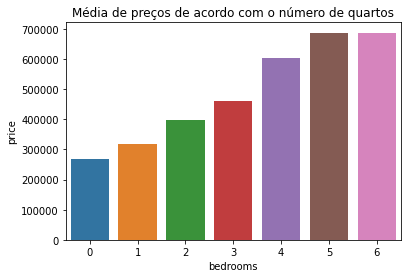

In [95]:
#Variação média de preço de acordo com o número de quarto
#Agrupando os quartos de acordo com a média de preços
sns.barplot(data= df_clean.groupby('bedrooms', as_index=False).mean(),y='price',x='bedrooms')
plt.title('Média de preços de acordo com o número de quartos')
plt.show()

In [96]:
#Observe a diferença entre os gráficos do Plotly para o seaborn

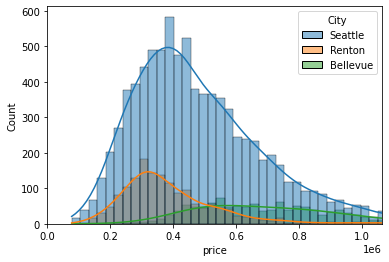

In [103]:
#Avaliando a faixa de preço mais comum dentre as 3 localidades com mais imóveis
#Observar os "C" de city, é maisculo
df_city =  df_clean[df_clean.City.isin(df_clean.City.value_counts()[:3].index)]
sns.histplot(data=df_city,x='price',hue='City',kde=True)
plt.xlim([0,df_city.price.median() + 2*df_city.price.std()])

plt.show()